### Importing

In [1]:
import numpy as np
import glob
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

### methods

In [2]:
def pFeatures(sequence):
    sequence = sequence.strip('\n')
    use_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    result = []
    for i in use_list:
        x = list(sequence).count(i)/len(sequence)*100
        result.append(x)
    return result

### TSNE_plot

In [3]:
def TSNE_Plot(X, temp, sil):
    X_embedded = TSNE(n_components=2).fit_transform(X)
    X_embedded = X_embedded.T
    x = X_embedded[0]
    y = X_embedded[1]
    fig = plt.figure(figsize=(8, 8))
    labels = temp[sil.index(max(sil))]
    plt.scatter(x, y, c=labels)
    plt.show()

### Kmeans clustering from sklearn

In [4]:
def KMeans_Clustering(X):
    temp = []
    sil = []
    for i in range(3,13):
        labels = KMeans(n_clusters=i).fit_predict(X)
        temp.append(labels)
        sil.append(silhouette_score(X, labels))

    print ('\nBased on Silhoutte distance optimal no. of clusters:', str(sil.index(max(sil))+3))

    choice = int(input("\nWant the TSNE plot for the clusters? Takes time...\n1. Yes\n2. No\nChoice: "))

    if choice == 1:
        TSNE_Plot(X, temp, sil)
    else:
        sys.exit

### Hierarchial_clustering from sklearn

In [5]:
def Hierarchical_Clustering(X):
    temp = []
    sil = []
    for i in range(3,13):
        labels = AgglomerativeClustering(n_clusters=i).fit_predict(X)
        temp.append(labels)
        sil.append(silhouette_score(X, labels))

    print ('\nBased on Silhoutte distance optimal no. of clusters:', str(sil.index(max(sil))+3))

    choice = int(input("\nWant the TSNE plot for the clusters? Takes time...\n1. Yes\n2. No\nChoice: "))

    if choice == 1:
        TSNE_Plot(X, temp, sil)
    else:
        sys.exit

### loading files and reading

In [9]:
files = glob.glob('data/2/*.data')
print('total #files:', len(files))
for eachFile in files:
    #     print(eachFile)
    f = open(eachFile, 'r')
    lines = f.readlines()
    #     print(lines)
    for l in lines:
        file = open('data/2/q2_fasta', 'a')
        file.write(l.split("::")[1])

total #files: 12


In [7]:
# print(file)

### loading dataset

In [10]:
f = open('data/2/q2_fasta', 'r')
lines = f.readlines()
X = []
for i in range(len(lines)):
    X.append(pFeatures(lines[i]))
X = np.array(X)


In [ ]:
# print(len(X))

### input and choosing technique

1.K-Means clustering
2. Hierarchical clustering
choice: 1

Based on Silhoutte distance optimal no. of clusters: 6

Want the TSNE plot for the clusters? Takes time...
1. Yes
2. No
Choice: 1


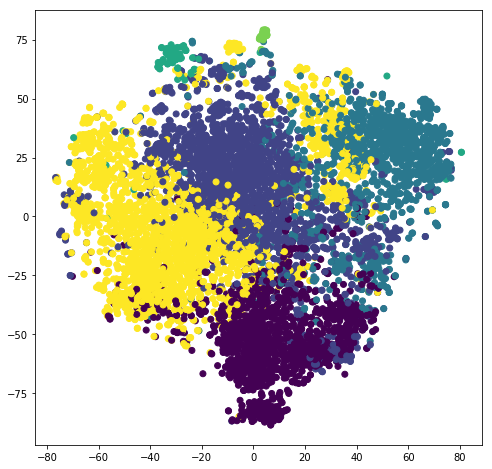

In [11]:
choice = int(input("1.K-Means clustering\n2. Hierarchical clustering\nchoice: "))

if (choice == 1):
    KMeans_Clustering(X)
else:
    Hierarchical_Clustering(X)